# Approssimazione con $S^0 (\Omega)$

Dato $ \Omega = [a,b)$, una partizione $ P = \{ t_0 = a < t_1 < \ldots < t_n = b \} $ e un parametro $ \beta \in [0,1] $ vogliamo studiare l'operatore $\mathcal{A}_{\beta,P} : \mathcal{C}^0(\Omega) \to S^0(\Omega)$ definito come $ f \mapsto \sum_{i=1}^n f(\eta_{k,\beta}) \chi_{I_k}$ con $\eta_{k,\beta} = t_{k-1} + \beta (t_k - t_{k-1})$

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets
import math
from Partition import Partition
from Approximation import ConstantApproximation, LinearContApproximation
from ErrorMetrics import ErrorManager, MaxNorm

In [2]:
def _testInteractive(funct, a, b, n, beta):
    interp = ConstantApproximation(Partition.Uniform(a,b,n), funct, beta)
    interp.plot()
    
def interactive(fun):
    nSlid = IntSlider(min=1, max=30, step=1, continuous_update=False)
    betaSlid = FloatSlider(min=0.0, max=1.0, step=0.05, continuous_update=False)
    
    interact(_testInteractive, funct=fixed(fun), a=(-10.0,10.0, 0.5), b=(0.0,10.0, 0.5), n=nSlid, beta=betaSlid)

# Variazione dei parametri
Prendiamo come funzione $ f(x) = x^2 $ e confrontiamo la target function e l'approssimante al variare dei parametri

In [3]:
f = lambda x : x*x

In [4]:
interactive(f)

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

# Errore vs Beta

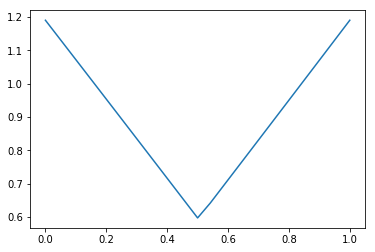

In [5]:
a = -4.0
b = 6.0
n = 100
errors = []
interps = []

for beta in np.linspace(0.0, 1.0, 25):
    u = Partition.Uniform(a,b,n)
    interp = ConstantApproximation(u, f, beta)
    interps.append(interp)
    errors.append(MaxNorm(interp))
    
plt.plot(np.linspace(0.0, 1.0, 25), errors)
plt.show()

# EOC
Plottiamo l'errore in norma infinito vs il numero di elementi nella partizione che è proporzionale a $ \frac{1}{h} $
Definiamo come $EOC_n = \log_2 \left( \frac{e_{n/2}}{e_n} \right)$ e studiamo l'ordine di convergenza delle funzioni $f_{\rho}(x) = x^{\rho}$ con $x \in [0,1]$
Ricordiamo che i risultati teorici ci dicono che:

1. L'errore in norma infinito scende in modo lineare con la dimensione della partizione se e solo se f è Lipschitz.
2. L'errore in norma infinito scende in modo proporzionale a $h_{\mathcal{P}}^{\alpha}$ con $\alpha \in (0,1)$ se e solo se $f \in Hol^{\alpha}\left([0,1]\right)$.
3. Se l'errore in norma infinito scende più velocemente che linearmente, allora la $f$ è una costante.

In [14]:
def TestEOC(p, n_start, runs, a, b, appr, mon): 
    dic = {
        "Constant" : ConstantApproximation, 
        "Linear" :LinearContApproximation
    }
    
    f = None
    if p > 0:
        f = lambda x : x**p
    else:
        f = lambda x : -1/(np.log(x/np.e))
    
    ns = [n_start * (2**n) for n in range(runs)]
    interp = None
    
    EM = ErrorManager(MaxNorm)
    
    for n in ns:
        u = Partition.Uniform(a, b, n)
        interp = dic[appr](u, f)
        EM.PushError(interp, mon, points = 50)  
        
    print(EM.EOC) 
    plt.xlim((-0.05, 1.05))
    plt.ylim((-0.05, 1.05))
    interp.plot()
    EM.Plot()

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
clss = ["Constant", "Linear"]
interact(TestEOC, p=(0.0, 2, 0.05), n_start=fixed(1), runs=fixed(6), a=(-0.1, 0.1, 0.02), b=fixed(1), appr=clss, mon=[True, False]);

interactive(children=(FloatSlider(value=1.0, description='p', max=2.0, step=0.05), FloatSlider(value=0.0, desc…

Notiamo che per $p \gg 1$, l'EOC raggiunge il suo valore teorico solo per n più grandi. Si può spiegare a causa della norma $\mathcal{A}_r$ più grande di queste funzioni, o della loro costante di Lipschitz più grande.